In [1]:
import os
import numpy as np

import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1

In [2]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
batch_size = 256
num_classes = 10
epochs = 200
data_augmentation = True

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)
50000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Conv2D(filters = 96, kernel_size = (11, 11), strides = (4, 4), padding = 'valid', input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = "same")) # stride 2 -> 1

model.add(Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = "same")) # stride 2 -> 1

model.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = "same")) # stride 2 -> 1
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 96)          34944     
_________________________________________________________________
activation (Activation)      (None, 6, 6, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 256)         614656    
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 256)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv

In [5]:
model.compile(loss='categorical_crossentropy',
	optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8),
	metrics=['accuracy'])
model.load_weights('saved_models/A_Model_Weights.h5')

In [6]:
model2_1 = Sequential()
model2_1.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2_1.add(Activation('relu'))
model2_1.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_1.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_1.add(Activation('relu'))
model2_1.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_1.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_1.add(Activation('relu'))
model2_1.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_1.add(Flatten())
model2_1.add(Dense(500))
model2_1.add(Activation('relu'))
model2_1.add(Dense(num_classes))
model2_1.add(Activation('softmax'))
model2_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       73856     
__________

In [7]:
def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a    
    return y

In [8]:
# Generate soft targets
from tensorflow.keras.layers import Activation, Lambda, concatenate
from tensorflow.keras.models import Model
temperature = 1.0
student_model1 = model
soft_model = Model(inputs = student_model1.layers[0].input, outputs = student_model1.layers[-2].output)
logits = soft_model.predict(x_train)
logits_T = logits / temperature
y_train_soft = np.array([softmax(logit) for logit in logits_T])

In [ ]:
y_train_soft

In [9]:
# Knowledge_Distillation_Loss
from keras.losses import categorical_crossentropy
from keras import backend as K
def knowledge_distillation_loss(y_true, y_pred, lambda_const):
    y_true, logits = y_true[:, :num_classes], y_true[:, num_classes:]
    y_soft = K.softmax(logits / temperature)
    y_pred, y_pred_soft = y_pred[:, :num_classes], y_pred[:, num_classes:]
    return lambda_const * categorical_crossentropy(y_true, y_pred) + (1-lambda_const) * categorical_crossentropy(y_soft, y_pred_soft)

In [10]:
model2_1.compile(loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const = 0.1),
               optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8), 
               metrics=['accuracy'])

In [11]:
datagen = ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True,  # randomly flip images
	vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [12]:
# Fit
hist2 = model2_1.fit_generator(datagen.flow(x_train, y_train,
	batch_size=batch_size),
	epochs=epochs,
	validation_data=(x_test, y_test),
	workers=0)

Instructions for updating:
Use tf.cast instead.
98/98 [==============================] - 29s 296ms/step - loss: 0.1885 - acc: 0.3111 - val_loss: 0.1600 - val_acc: 0.4214


In [13]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'B_Model1_Weights.h5')
model2_1.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Justin\Desktop\Assignment1\saved_models\B_Model1_Weights.h5 


In [14]:
# Score trained model.
train_scores = model2_1.evaluate(x_train, y_train, verbose=1)
print('Train loss:', train_scores[0])
print('Train accuracy:', train_scores[1])
test_scores = model2_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

50000/50000 [==============================] - 8s 155us/sample - loss: 0.1604 - acc: 0.4213
Train loss: 0.16037867317199708
Train accuracy: 0.42128
10000/10000 [==============================] - 2s 153us/sample - loss: 0.1600 - acc: 0.4214
Test loss: 0.15998547945022584
Test accuracy: 0.4214


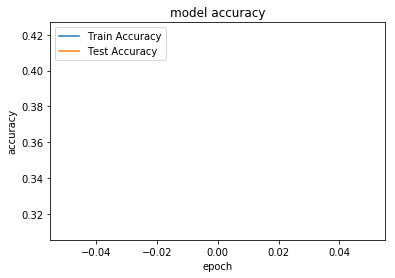

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

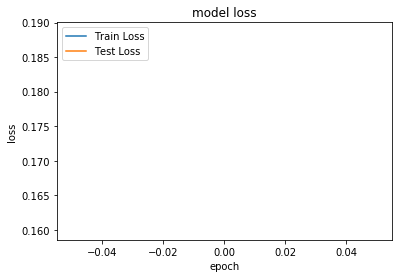

In [16]:
## summarize history for loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

In [17]:
model2_2 = Sequential()
model2_2.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2_2.add(Activation('relu'))
model2_2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_2.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_2.add(Activation('relu'))
model2_2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_2.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_2.add(Activation('relu'))
model2_2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_2.add(Flatten())
model2_2.add(Dense(500))
model2_2.add(Activation('relu'))
model2_2.add(Dense(num_classes))
model2_2.add(Activation('softmax'))
model2_2.summary()

temperature = 5.0
logits_T2 = logits / temperature
y_train_soft2 = np.array([softmax(logit) for logit in logits_T2])

model2_2.compile(loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const = 0.1),
               optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8), 
               metrics=['accuracy'])

# Fit
hist3 = model2_2.fit_generator(datagen.flow(x_train, y_train,
	batch_size=batch_size),
	epochs=epochs,
	validation_data=(x_test, y_test),
	workers=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 128)       73856     
__________

In [18]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'B_Model2_Weights.h5')
model2_2.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
train_scores2 = model2_2.evaluate(x_train, y_train, verbose=1)
print('Train loss:', train_scores2[0])
print('Train accuracy:', train_scores2[1])
test_scores2 = model2_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores2[0])
print('Test accuracy:', test_scores2[1])

Saved trained model at C:\Users\Justin\Desktop\Assignment1\saved_models\B_Model2_Weights.h5 
50000/50000 [==============================] - 8s 153us/sample - loss: 0.1674 - acc: 0.4016
Train loss: 0.16738133883953094
Train accuracy: 0.40156
10000/10000 [==============================] - 2s 155us/sample - loss: 0.1669 - acc: 0.4031
Test loss: 0.16686722779273988
Test accuracy: 0.4031


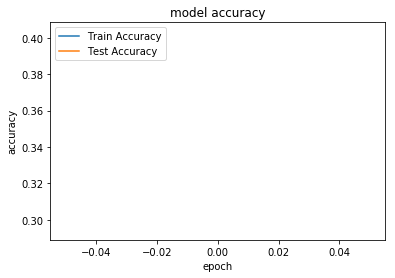

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist3.history['acc'])
plt.plot(hist3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

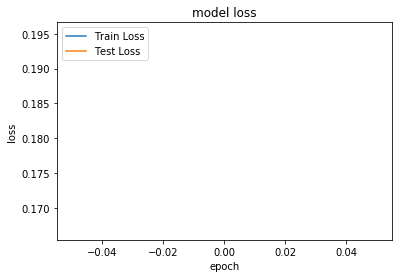

In [20]:
## summarize history for loss
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

In [21]:
model2_3 = Sequential()
model2_3.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2_3.add(Activation('relu'))
model2_3.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_3.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_3.add(Activation('relu'))
model2_3.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_3.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_3.add(Activation('relu'))
model2_3.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_3.add(Flatten())
model2_3.add(Dense(500))
model2_3.add(Activation('relu'))
model2_3.add(Dense(num_classes))
model2_3.add(Activation('softmax'))
model2_3.summary()

temperature = 10.0
logits_T3 = logits / temperature
y_train_soft3 = np.array([softmax(logit) for logit in logits_T3])

model2_3.compile(loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const = 0.1),
               optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8), 
               metrics=['accuracy'])

# Fit
hist4 = model2_3.fit_generator(datagen.flow(x_train, y_train,
	batch_size=batch_size),
	epochs=epochs,
	validation_data=(x_test, y_test),
	workers=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 128)       73856     
__________

In [22]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'B_Model3_Weights.h5')
model2_3.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
train_scores3 = model2_3.evaluate(x_train, y_train, verbose=1)
print('Train loss:', train_scores3[0])
print('Train accuracy:', train_scores3[1])
test_scores3 = model2_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores3[0])
print('Test accuracy:', test_scores3[1])

Saved trained model at C:\Users\Justin\Desktop\Assignment1\saved_models\B_Model3_Weights.h5 
50000/50000 [==============================] - 8s 155us/sample - loss: 0.1704 - acc: 0.3704
Train loss: 0.17043983269691468
Train accuracy: 0.37036
10000/10000 [==============================] - 2s 155us/sample - loss: 0.1691 - acc: 0.3752
Test loss: 0.16905596699714662
Test accuracy: 0.3752


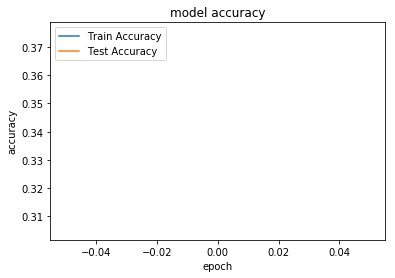

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist4.history['acc'])
plt.plot(hist4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

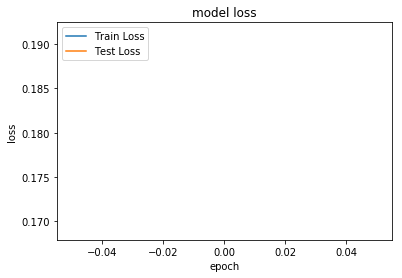

In [24]:
## summarize history for loss
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

In [25]:
model2_4 = Sequential()
model2_4.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2_4.add(Activation('relu'))
model2_4.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_4.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_4.add(Activation('relu'))
model2_4.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_4.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_4.add(Activation('relu'))
model2_4.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_4.add(Flatten())
model2_4.add(Dense(500))
model2_4.add(Activation('relu'))
model2_4.add(Dense(num_classes))
model2_4.add(Activation('softmax'))
model2_4.summary()

temperature = 20.0
logits_T4 = logits / temperature
y_train_soft4 = np.array([softmax(logit) for logit in logits_T4])

model2_4.compile(loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const = 0.1),
               optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8), 
               metrics=['accuracy'])

# Fit
hist5 = model2_4.fit_generator(datagen.flow(x_train, y_train,
	batch_size=batch_size),
	epochs=epochs,
	validation_data=(x_test, y_test),
	workers=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_23 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 128)       73856     
__________

In [26]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'B_Model4_Weights.h5')
model2_4.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
train_scores4 = model2_4.evaluate(x_train, y_train, verbose=1)
print('Train loss:', train_scores4[0])
print('Train accuracy:', train_scores4[1])
test_scores4 = model2_4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores4[0])
print('Test accuracy:', test_scores4[1])

Saved trained model at C:\Users\Justin\Desktop\Assignment1\saved_models\B_Model4_Weights.h5 
50000/50000 [==============================] - 8s 165us/sample - loss: 0.1722 - acc: 0.3812
Train loss: 0.1721597692680359
Train accuracy: 0.38116
10000/10000 [==============================] - 2s 163us/sample - loss: 0.1720 - acc: 0.3839
Test loss: 0.172025977396965
Test accuracy: 0.3839


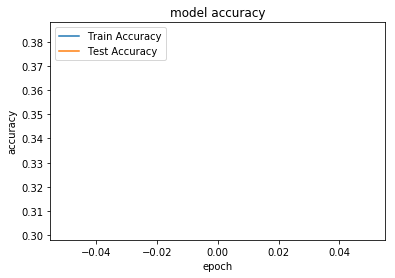

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist5.history['acc'])
plt.plot(hist5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

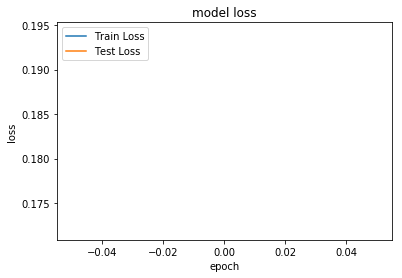

In [28]:
## summarize history for loss
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_28 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 128)       73856     
__________

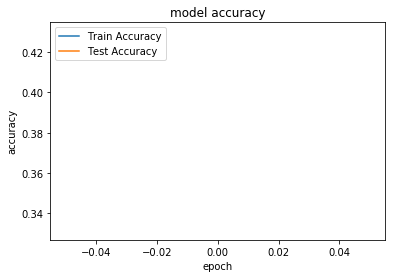

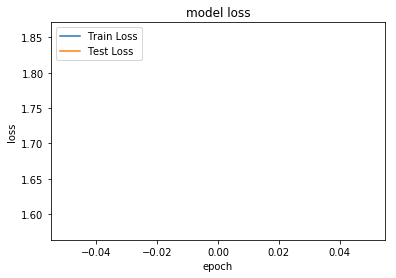

In [29]:
model2_5 = Sequential()
model2_5.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2_5.add(Activation('relu'))
model2_5.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_5.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_5.add(Activation('relu'))
model2_5.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_5.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_5.add(Activation('relu'))
model2_5.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_5.add(Flatten())
model2_5.add(Dense(500))
model2_5.add(Activation('relu'))
model2_5.add(Dense(num_classes))
model2_5.add(Activation('softmax'))
model2_5.summary()

temperature = 20.0
logits_T5 = logits / temperature
y_train_soft5 = np.array([softmax(logit) for logit in logits_T5])

model2_5.compile(loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const = 1),
               optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8), 
               metrics=['accuracy'])

# Fit
hist6 = model2_5.fit_generator(datagen.flow(x_train, y_train,
	batch_size=batch_size),
	epochs=epochs,
	validation_data=(x_test, y_test),
	workers=0)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'B_Model5_Weights.h5')
model2_5.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
train_scores5 = model2_5.evaluate(x_train, y_train, verbose=1)
print('Train loss:', train_scores5[0])
print('Train accuracy:', train_scores5[1])
test_scores5 = model2_5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores5[0])
print('Test accuracy:', test_scores5[1])

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist6.history['acc'])
plt.plot(hist6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

## summarize history for loss
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_33 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 128)       73856     
__________

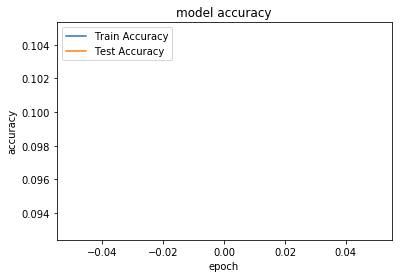

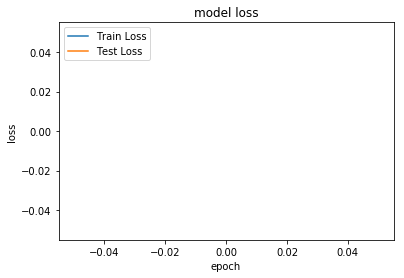

In [30]:
model2_6 = Sequential()
model2_6.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2_6.add(Activation('relu'))
model2_6.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_6.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_6.add(Activation('relu'))
model2_6.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_6.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2_6.add(Activation('relu'))
model2_6.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2_6.add(Flatten())
model2_6.add(Dense(500))
model2_6.add(Activation('relu'))
model2_6.add(Dense(num_classes))
model2_6.add(Activation('softmax'))
model2_6.summary()

temperature = 20.0
logits_T6 = logits / temperature
y_train_soft6 = np.array([softmax(logit) for logit in logits_T6])

model2_6.compile(loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const = 0),
               optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8), 
               metrics=['accuracy'])

# Fit
hist7 = model2_6.fit_generator(datagen.flow(x_train, y_train,
	batch_size=batch_size),
	epochs=epochs,
	validation_data=(x_test, y_test),
	workers=0)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'B_Model6_Weights.h5')
model2_6.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
train_scores6 = model2_6.evaluate(x_train, y_train, verbose=1)
print('Train loss:', train_scores5[0])
print('Train accuracy:', train_scores5[1])
test_scores6 = model2_6.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores5[0])
print('Test accuracy:', test_scores5[1])

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist7.history['acc'])
plt.plot(hist7.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

## summarize history for loss
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()